# 해외시장동향 크롤링

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import re #정규식 표현을 위한 모듈 
import requests
!pip install konlpy
import konlpy
import pytagcloud 
from konlpy.tag import Okt
from collections import Counter 
import random
import pytagcloud
import webbrowser
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [26]:
titles=[] #타이틀만 담은 리스트
hrefs=[] #링크만 담은 리스트 
contentList=[] #컨텐츠리스트만 담은 리스트 

#데이터 프레임
columns = ["title" , "contentList"]
df = pd.DataFrame(columns=columns)


base_url='https://www.kita.net/cmmrcInfo/rsrchReprt/ovseaMrktReprt/ovseaMrktReprtDetail.do?pageIndex=1&no='
base_url2='&type='



for num in range(3):
    response = requests.get(f"https://www.kita.net/cmmrcInfo/rsrchReprt/ovseaMrktReprt/ovseaMrktReprtList.do?pageIndex={num}")
    response
    html = response.text
    soup = BeautifulSoup(html,'html.parser')
    
    #제목 추출
    aTag = soup.select('#contents > div.boardArea > div.boardList.type2 > ul > li > a')
    for a in aTag:
        title = a.text.replace('\t','').replace('\n','') #제목 
        titles.append(title) # 제목 리스트에 추가
        
        href = a.attrs['href'].split(',')[1] #링크 
        href_type=aTag[0].attrs['href'].split(',')[3]
        href_type=re.sub(r'[^0-9]', '',href_type) #숫자만 추출
        href = (f'{base_url}{href}{base_url2}{href_type}')
        href = href.replace('\n','')
        response= requests.get(href)
        
        #링크안 페이지 내용
        html = response.text #링크 안 페이지 
        soup = BeautifulSoup(html,'html.parser')
        
        if soup.select('#contents > div.boardArea > div.boardView > div.txtArea > p'):    
            con=[] #페이지의 내용을 담을 빈 배열 
            content=soup.select('#contents > div.boardArea > div.boardView > div.txtArea > p')
            for i in content:
                con.append(i.text)
                conList=','.join(con)
            contentList.append(conList)
        else:
            conList=" "
            contentList.append(" ")
            
 #데이터프레임      
        row = [title, conList]
        series = pd.Series(row, index=df.columns)
        df = df.append(series, ignore_index=True)
    
df

,title,contentList
0,2022년 달라지는 중국의 주요 경제무역 법규,"부문별로는 외국 기업의 대중국 투자, RCEP(역내 포괄적 경제동반자 협정), 식품..."
1,2022년 베트남 의료기기산업 현황 및 전망,
2,쓰촨성 구강의료 산업단지 현황,"= 목 차 =,\r\n1. 쓰촨성 구강의료산업의 현황·················..."
3,중국 2019~2021년 `솽스이`(&#21452;十一) 매출분석을 통한 소비변화,"= 목 차 =\r\n,1. 2019~2021년 ‘솽스이’ 매출 현황 ········..."
4,코로나19가 앞당긴 중국의 도심 스마트물류,
5,11월 중국 무역동향,
6,제품 자체에 원산지 표기가 어려운 물품의 원산지 표기,Q. 뜨개실을 중국에 수출하려는에 상품에 Made in Korea 가 따로 적혀 있...
7,제2종 의료기기 대중국 수출관련 절차,Q. 2021년 6월 28일 국가약품감독관리국이 제2종 의료기기 등록증 면제 품목을...
8,치약 대중국 수출관련 절차,"Q. 치약 제품을 중국으로 수출할 경우, 관세, 증치세는 얼마이고 어떤 인증/신고/..."
9,약재 성분이 포함된 주류의 중국수출,"Q. 약재 성분이 포함된 주류의 중국수출, 가능할까요?,A. '보건 식품 등록' 방..."


In [5]:
def text_cleaning(text):
    #한글과 띄어쓰기를 제외한 모든 글자 패턴을 지정하여 hangul로 정의
    hangul = re.compile('[^ㄱ-ㅣ가-힣]+') # ^ 있으면 한글만 나옴 . ^ 없으면 한글을 지움 
    result=hangul.sub(' ', text) #한글과 띄어쓰기를 제외한 모든 글자 패턴을 ''빈 문자로 치환
    return result

In [6]:
df['title'][0]
print(text_cleaning(df['title'][0]))

 년 달라지는 중국의 주요 경제무역 법규


In [7]:
df['title'] = df['title'].apply(lambda x: text_cleaning(x)) 
df['title']

0                       년 달라지는 중국의 주요 경제무역 법규
1                        년 베트남 의료기기산업 현황 및 전망
2                            쓰촨성 구강의료 산업단지 현황
3                      중국 년 솽스이 매출분석을 통한 소비변화
4                      코로나 가 앞당긴 중국의 도심 스마트물류
5                                   월 중국 무역동향
6               제품 자체에 원산지 표기가 어려운 물품의 원산지 표기
7                        제 종 의료기기 대중국 수출관련 절차
8                              치약 대중국 수출관련 절차
9                         약재 성분이 포함된 주류의 중국수출
10                               유산균 제품의 중국수출
11                              영유아 동화책의 중국수출
12                        러시아산 냉동 킹크랩의 중국 재수출
13                        볶은 커피 원두 분말 의 중국 수출
14                             생수 광천수 의 중국 수출
15           국경 간 무역편리화 개혁에 관한 통지 를 활용한 중국 수출
16                           탈모샴푸의 중국 인증 및 수출
17                     중국 수입식품경외생산 제도 발효 의 활용
18            중국 건강기능식품 등록 대행업체와 계약 체결 시 주의사항
19                어댑터를 통해 전원공급을 하는 기기의 중국수출인증
20                      전복 통조림 냉동 생물 제품의 중국수출
21                       코로나 이후 중국

In [8]:
df['title'].tolist()
"".join(df['title'].tolist())
title_corpus = "".join(df['title'].tolist())
title_corpus 

' 년 달라지는 중국의 주요 경제무역 법규 년 베트남 의료기기산업 현황 및 전망쓰촨성 구강의료 산업단지 현황중국 년 솽스이 매출분석을 통한 소비변화코로나 가 앞당긴 중국의 도심 스마트물류 월 중국 무역동향제품 자체에 원산지 표기가 어려운 물품의 원산지 표기제 종 의료기기 대중국 수출관련 절차치약 대중국 수출관련 절차약재 성분이 포함된 주류의 중국수출유산균 제품의 중국수출영유아 동화책의 중국수출러시아산 냉동 킹크랩의 중국 재수출볶은 커피 원두 분말 의 중국 수출생수 광천수 의 중국 수출 국경 간 무역편리화 개혁에 관한 통지 를 활용한 중국 수출탈모샴푸의 중국 인증 및 수출중국 수입식품경외생산 제도 발효 의 활용중국 건강기능식품 등록 대행업체와 계약 체결 시 주의사항어댑터를 통해 전원공급을 하는 기기의 중국수출인증전복 통조림 냉동 생물 제품의 중국수출코로나 이후 중국의 소비 트렌드 변화최근 중국 항공물류 동향 및 전망충칭시 국제소비중심도시건설 관련 정책 및 시사점중국 오존층파괴물질 수출입제한목록 발표 주중 한국기업 구직자 성향분석 보고서 년 분기 화동 화남지역 경제 동향 년 분기 베트남 및 한 베트남 수출입 동향 년 중국 주요 온라인 기업 솽스이 광군절 개최 결과중국 렌즈 시장의 현황 및 시사점 년 분기 중동 북아프리카 지역별 수출입 동향중국 외자이용발전규획중국 특수의학용도 조제식품 시장 동향중국 구강의료산업 발전현황 및 시사점최근 중국 해운 시장 동향 및 전망 년 분기 베트남 경제 동향 자동차 시장 현황중국 세관총서 신규 등록등기와 비안기업신용관리방법 주요내용 및 시사점  중국 및 한중 서비스무역 동향 년 상반기 베트남 및 한 베 수출입 동향'

In [9]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus ) # nouns() 함수를 이용하여 content_corpus 문장 중 명사만을 추출
count = Counter(nouns) #각 명사의 빈도수 계산 

In [10]:
count

Counter({'년': 9,
         '중국': 29,
         '주요': 2,
         '경제': 3,
         '무역': 4,
         '법규': 1,
         '베트남': 5,
         '의료기기': 2,
         '산업': 3,
         '현황': 5,
         '및': 11,
         '전망': 3,
         '쓰촨성': 1,
         '구강': 2,
         '의료': 2,
         '단지': 1,
         '솽스이': 2,
         '매출': 1,
         '분석': 2,
         '통한': 1,
         '소비': 3,
         '변화': 2,
         '코로나': 2,
         '도심': 1,
         '스마트': 1,
         '물류': 2,
         '월': 1,
         '동향': 10,
         '제품': 3,
         '자체': 1,
         '원산지': 2,
         '표기': 2,
         '물품': 1,
         '제': 1,
         '종': 1,
         '수출': 11,
         '관련': 3,
         '절차': 2,
         '치약': 1,
         '약재': 1,
         '성분': 1,
         '포함': 1,
         '주류': 1,
         '유산균': 1,
         '유아': 1,
         '동화책': 1,
         '러시': 1,
         '아산': 1,
         '냉동': 2,
         '킹크랩': 1,
         '재수출': 1,
         '커피': 1,
         '원두': 1,
         '분말': 1,
         '의': 3,


In [11]:
remove_char_counter = Counter({x:count[x] for x in count if len(x) >1})
print(remove_char_counter)

Counter({'중국': 29, '수출': 11, '동향': 10, '베트남': 5, '현황': 5, '무역': 4, '수출입': 4, '분기': 4, '시장': 4, '경제': 3, '산업': 3, '전망': 3, '소비': 3, '제품': 3, '관련': 3, '식품': 3, '시사': 3, '기업': 3, '주요': 2, '의료기기': 2, '구강': 2, '의료': 2, '솽스이': 2, '분석': 2, '변화': 2, '코로나': 2, '물류': 2, '원산지': 2, '표기': 2, '절차': 2, '냉동': 2, '활용': 2, '인증': 2, '등록': 2, '최근': 2, '법규': 1, '쓰촨성': 1, '단지': 1, '매출': 1, '통한': 1, '도심': 1, '스마트': 1, '자체': 1, '물품': 1, '치약': 1, '약재': 1, '성분': 1, '포함': 1, '주류': 1, '유산균': 1, '유아': 1, '동화책': 1, '러시': 1, '아산': 1, '킹크랩': 1, '재수출': 1, '커피': 1, '원두': 1, '분말': 1, '생수': 1, '광천수': 1, '국경': 1, '편리': 1, '개혁': 1, '통지': 1, '탈모': 1, '샴푸': 1, '수입': 1, '생산': 1, '제도': 1, '발효': 1, '건강': 1, '기능': 1, '대행': 1, '업체': 1, '계약': 1, '체결': 1, '주의': 1, '사항': 1, '어댑터': 1, '통해': 1, '공급': 1, '기기': 1, '전복': 1, '통조림': 1, '생물': 1, '이후': 1, '트렌드': 1, '항공': 1, '충칭시': 1, '국제': 1, '중심': 1, '도시': 1, '건설': 1, '정책': 1, '오존층': 1, '파괴': 1, '물질': 1, '제한': 1, '목록': 1, '발표': 1, '주중': 1, '한국': 1, '구직': 1, '성향': 1, '보고서': 1, '화동': 1, '화남':

In [12]:
ranked_tags = remove_char_counter.most_common(40)
ranked_tags

[('중국', 29),
 ('수출', 11),
 ('동향', 10),
 ('베트남', 5),
 ('현황', 5),
 ('무역', 4),
 ('수출입', 4),
 ('분기', 4),
 ('시장', 4),
 ('경제', 3),
 ('산업', 3),
 ('전망', 3),
 ('소비', 3),
 ('제품', 3),
 ('관련', 3),
 ('식품', 3),
 ('시사', 3),
 ('기업', 3),
 ('주요', 2),
 ('의료기기', 2),
 ('구강', 2),
 ('의료', 2),
 ('솽스이', 2),
 ('분석', 2),
 ('변화', 2),
 ('코로나', 2),
 ('물류', 2),
 ('원산지', 2),
 ('표기', 2),
 ('절차', 2),
 ('냉동', 2),
 ('활용', 2),
 ('인증', 2),
 ('등록', 2),
 ('최근', 2),
 ('법규', 1),
 ('쓰촨성', 1),
 ('단지', 1),
 ('매출', 1),
 ('통한', 1)]

(-0.5, 779.5, 1035.5, -0.5)

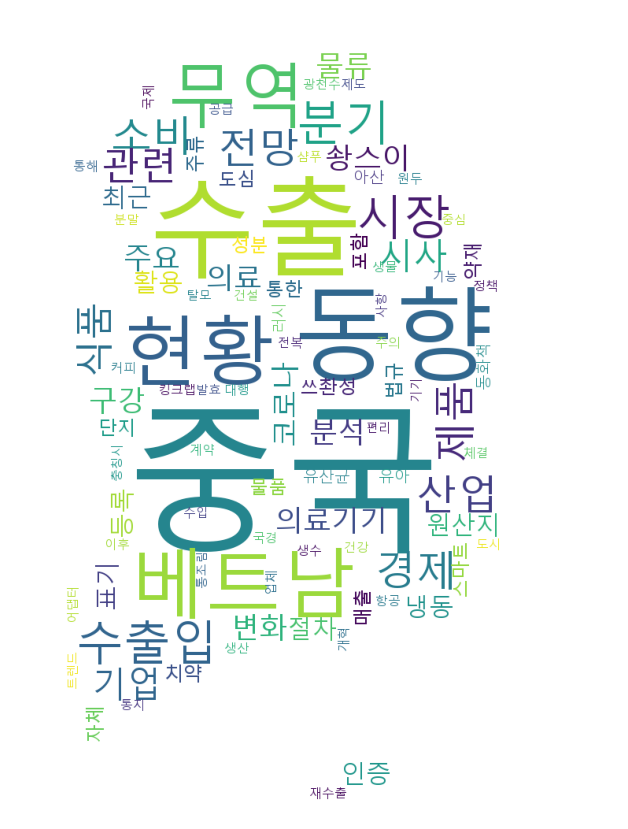

In [13]:
img = Image.open('images.jpg')
img_array= np.array(img)


wc = WordCloud(font_path='malgun', width=2000, height=2000, scale=4.0, max_font_size=50, 
               mask= img_array, background_color='white')
gen= wc.generate_from_frequencies(remove_char_counter)


plt.figure(figsize=(15,15))
plt.imshow(gen)
plt.axis('off')